In [176]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *
import os
import voila

In [177]:
path = Path()
path.ls(file_exts='.pkl')
learn_inference = load_learner(path/'export.pkl')

In [178]:
btn_upload = widgets.FileUpload()

In [179]:
btn_upload = SimpleNamespace(data = [r"C:\Users\Horri\Documents\satellite classifier\ship_2.PNG"])

In [180]:
img = PILImage.create(btn_upload.data[-1])

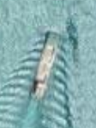

Output()

In [181]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [182]:
pred,pred_index,probs = learn_inference.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_index]:.04f}'

In [183]:
btn_run = widgets.Button(description='Classify')

In [184]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_index,probs = learn_inference.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_index]:.04f}'

btn_run.on_click(on_click_classify)

In [185]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Upload a Satellite Image of a Container Ship'), 
      btn_upload, btn_run, out_pl, lbl_pred])